## Data Wrangling

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

In [7]:
cd D:\Group-7

D:\Group-7


In [8]:
#retrieving data
parkingdata = pd.read_csv("parking-small.csv")
parkingdata.shape

(999, 13)

In [9]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,Victoria Market,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,24/08/2012 11:34:36 AM,24/08/2012 12:49:09 PM,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
1,Courtney,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,17/03/2012 01:07:59 PM,17/03/2012 01:10:06 PM,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2,Victoria Market,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,17/02/2012 01:54:34 PM,17/02/2012 02:20:17 PM,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
3,Chinatown,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,27/11/2011 03:03:19 PM,27/11/2011 04:02:41 PM,3562,1P SUN 7:30-18:30,0,894,1770
4,Southbank,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,21/04/2012 03:08:32 PM,21/04/2012 05:06:00 PM,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584


In [10]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
994,Princes Theatre,SPRING STREET,LONSDALE STREET,Lt BOURKE STREET,5,65W,27/08/2012 05:42:47 PM,27/08/2012 05:45:01 PM,134,LZ 15M M-SUN 7:30-19:30,0,1288,6986
995,Hardware,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2912,04/04/2012 01:52:51 PM,04/04/2012 02:22:32 PM,1781,1P MTR M-SAT 7:30-19:30,0,894,1941
996,Magistrates,LA TROBE STREET,KING STREET,WILLIAM STREET,4,3891S,14/09/2012 04:59:28 PM,14/09/2012 05:03:19 PM,231,2P TKT A M-SAT 7:30-20:30,0,856,2157
997,Regency,RUSSELL STREET,LA TROBE STREET,Lt LONSDALE STREET,5,899W,02/11/2011 05:40:34 PM,02/11/2011 08:30:00 PM,10166,3P MTR M-SAT 7:30-20:30,0,1221,468
998,Magistrates,SPENCER STREET,Lt LONSDALE STREET,LONSDALE STREET,5,1555W,22/05/2012 01:24:35 PM,22/05/2012 02:14:08 PM,2973,2P TKT A M-F 9:30-16:00,0,1285,951


In [11]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [12]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        107
Regency             75
Titles              69
Princes Theatre     67
The Mac             66
Victoria Market     63
Southbank           58
Hyatt               50
Chinatown           49
Hardware            47
Spencer             42
Rialto              39
Courtney            39
County              38
City Square         36
Magistrates         36
RACV                34
Banks               32
Supreme             21
Jolimont            20
Tavistock            7
Docklands            3
West Melbourne       1
Name: Area Name, dtype: int64

In [13]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,24/08/2012 11:34:36 AM,24/08/2012 12:49:09 PM,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
1,COURTNEY,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,17/03/2012 01:07:59 PM,17/03/2012 01:10:06 PM,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,17/02/2012 01:54:34 PM,17/02/2012 02:20:17 PM,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
3,CHINATOWN,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,27/11/2011 03:03:19 PM,27/11/2011 04:02:41 PM,3562,1P SUN 7:30-18:30,0,894,1770
4,SOUTHBANK,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,21/04/2012 03:08:32 PM,21/04/2012 05:06:00 PM,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584


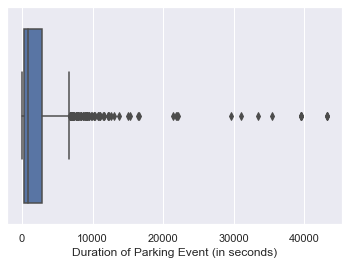

In [14]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [15]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [16]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             97
QUEEN STREET                73
LA TROBE STREET             62
RUSSELL STREET              58
COLLINS STREET              52
FRANKLIN STREET             52
EXHIBITION STREET           47
ELIZABETH STREET            47
BOURKE STREET               47
SPRING STREET               41
LT LONSDALE STREET          37
LT COLLINS STREET           29
ERROL STREET                24
WILLIAM STREET              21
FLINDERS LANE               20
LT BOURKE STREET            18
KING STREET                 18
QUEENSBERRY STREET          17
THERRY STREET               17
SPENCER STREET              15
A'BECKETT STREET            14
COVENTRY STREET             14
VICTORIA STREET             13
O'CONNELL STREET            11
FLINDERS STREET             11
CAPEL STREET                 9
SOUTHBANK BOULEVARD          8
WALSH STREET                 7
COBDEN STREET                7
ALBERT STREET                7
DORCAS STREET                7
GRANT STREET                 6
LEVESON 

In [17]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

QUEEN STREET           103
KING STREET             92
WILLIAM STREET          65
QUEENSBERRY STREET      62
RUSSELL STREET          57
SPENCER STREET          53
LT LONSDALE STREET      53
SWANSTON STREET         45
LONSDALE STREET         42
EXHIBITION STREET       36
LT COLLINS STREET       33
VICTORIA STREET         29
LT BOURKE STREET        28
BOURKE STREET           23
ELIZABETH STREET        22
LA TROBE STREET         22
COLLINS STREET          21
FLINDERS LANE           19
A'BECKETT STREET        18
ERROL STREET            13
WILLAM STREET           13
FRANKLIN STREET         12
WELLS STREET            11
FLINDERS STREET         10
O'CONNELL STREET         9
DODDS STREET             8
COBDEN STREET            8
STURT STREET             7
HOWARD STREET            7
VICTORIA PARADE          6
BALSTON STREET           6
SOUTHBANK BOULEVARD      6
THERRY STREET            6
KINGS WAY                5
ALBERT STREET            5
PEEL STREET              5
CITY ROAD                5
S

In [18]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

ELIZABETH STREET      104
VICTORIA STREET        86
WILLIAM STREET         79
QUEEN STREET           78
EXHIBITION STREET      56
LONSDALE STREET        54
KING STREET            53
LT BOURKE STREET       42
SPRING STREET          36
RUSSELL STREET         35
COLLINS STREET         33
FLINDERS LANE          31
LA TROBE STREET        30
BOURKE STREET          28
LT LONSDALE STREET     27
LT COLLINS STREET      23
SWANSTON STREET        22
FLINDERS STREET        19
LEVESON STREET         13
DODDS STREET           13
ST KILDA ROAD          11
WALSH STREET           10
QUEENSBERRY STREET      8
HAWKE STREET            8
KAVANAGH STREET         8
A'BECKETT STREET        7
POWER STREET            7
MILTON STREET           7
THERRY STREET           6
CAPEL STREET            6
LANSDOWNE STREET        6
FRANKLIN STREET         6
MILES STREET            5
WELLS STREET            5
CATHEDRAL PLACE         5
SPENCER STREET          3
EADES STREET            3
STURT STREET            3
DUDLEY STREE

In [19]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [20]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [21]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [22]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,2012-08-24 11:34:36,2012-08-24 12:49:09,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
1,COURTNEY,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,2012-03-17 13:07:59,2012-03-17 13:10:06,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,2012-02-17 13:54:34,2012-02-17 14:20:17,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
3,CHINATOWN,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,2011-11-27 15:03:19,2011-11-27 16:02:41,3562,1P SUN 7:30-18:30,0,894,1770
4,SOUTHBANK,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,2012-04-21 15:08:32,2012-04-21 17:06:00,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584


In [23]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
994,PRINCES THEATRE,SPRING STREET,LONSDALE STREET,LT BOURKE STREET,5,65W,2012-08-27 17:42:47,2012-08-27 17:45:01,134,LZ 15M M-SUN 7:30-19:30,0,1288,6986
995,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2912,2012-04-04 13:52:51,2012-04-04 14:22:32,1781,1P MTR M-SAT 7:30-19:30,0,894,1941
996,MAGISTRATES,LA TROBE STREET,KING STREET,WILLIAM STREET,4,3891S,2012-09-14 16:59:28,2012-09-14 17:03:19,231,2P TKT A M-SAT 7:30-20:30,0,856,2157
997,REGENCY,RUSSELL STREET,LA TROBE STREET,LT LONSDALE STREET,5,899W,2011-02-11 17:40:34,2011-02-11 20:30:00,10166,3P MTR M-SAT 7:30-20:30,0,1221,468
998,MAGISTRATES,SPENCER STREET,LT LONSDALE STREET,LONSDALE STREET,5,1555W,2012-05-22 13:24:35,2012-05-22 14:14:08,2973,2P TKT A M-F 9:30-16:00,0,1285,951


## Data Visualisation

### 1. Most popular parking street in 4 hour interval

In [24]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

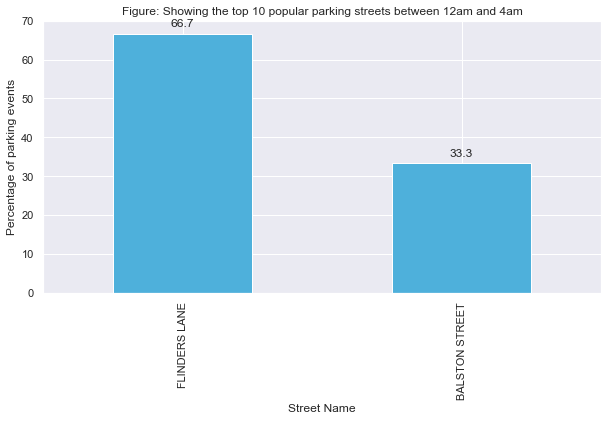

In [25]:
mask = (parkingdata['Arrival Time'].dt.hour >= 0) & (parkingdata['Arrival Time'].dt.hour <= 3)
between0and4 = parkingdata.loc[mask]
mostPopular = between0and4['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 12am and 4am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

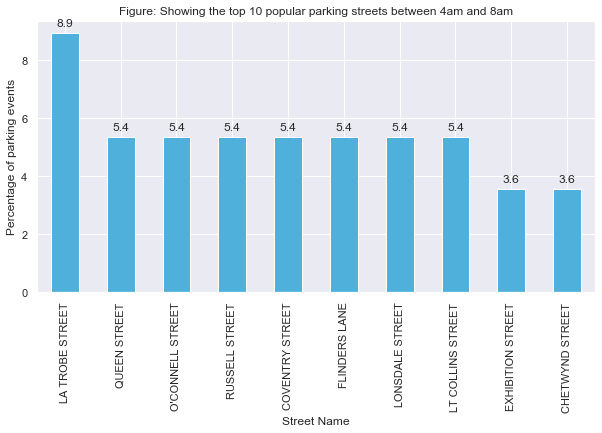

In [26]:
mask = (parkingdata['Arrival Time'].dt.hour >= 4) & (parkingdata['Arrival Time'].dt.hour <= 7)
between4and8 = parkingdata.loc[mask]
mostPopular = between4and8['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 4am and 8am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

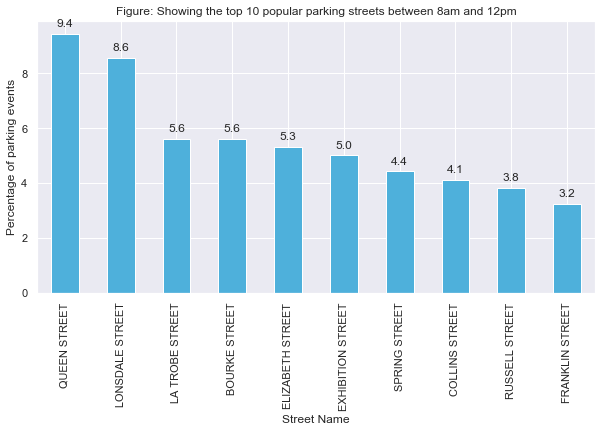

In [27]:
mask = (parkingdata['Arrival Time'].dt.hour >= 8) & (parkingdata['Arrival Time'].dt.hour <= 11)
between8and12 = parkingdata.loc[mask]
mostPopular = between8and12['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 8am and 12pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

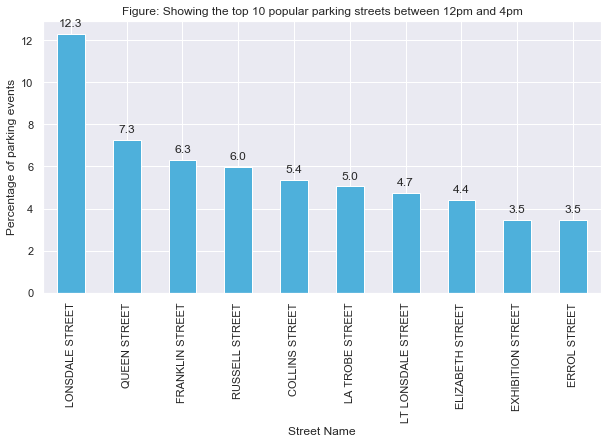

In [28]:
mask = (parkingdata['Arrival Time'].dt.hour >= 12) & (parkingdata['Arrival Time'].dt.hour <= 15)
between12and16 = parkingdata.loc[mask]
mostPopular = between12and16['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 12pm and 4pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

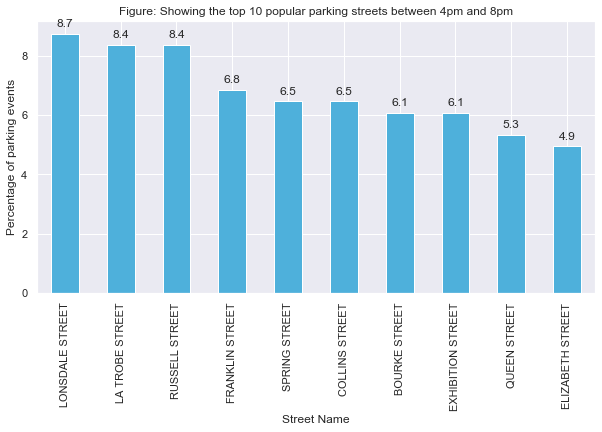

In [29]:
mask = (parkingdata['Arrival Time'].dt.hour >= 16) & (parkingdata['Arrival Time'].dt.hour <= 19)
between16and20 = parkingdata.loc[mask]
mostPopular = between16and20['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 4pm and 8pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

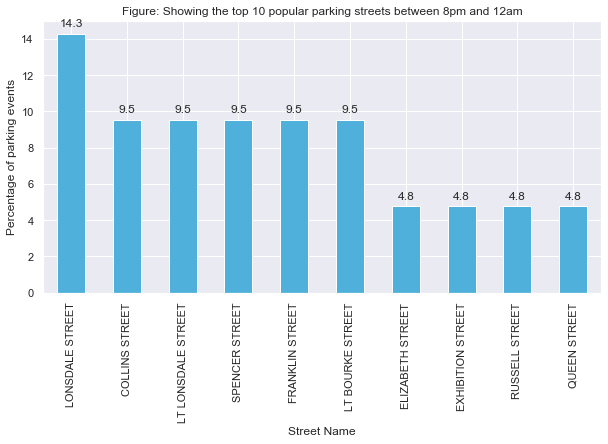

In [30]:
mask = (parkingdata['Arrival Time'].dt.hour >= 20) & (parkingdata['Arrival Time'].dt.hour <= 23)
between20and00 = parkingdata.loc[mask]
mostPopular = between20and00['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 8pm and 12am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

### 2. Most popular parking area in 4 hour interval

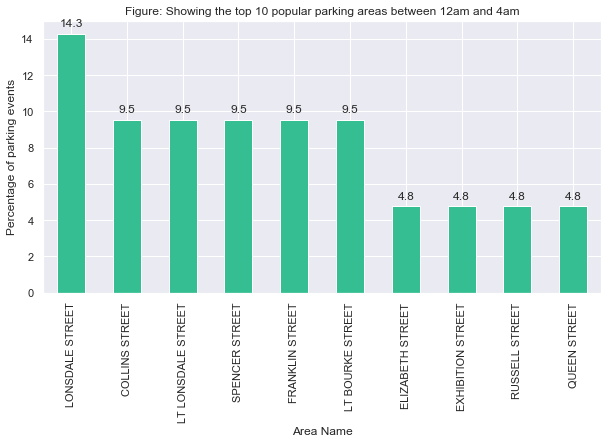

In [31]:
mask = (parkingdata['Arrival Time'].dt.hour >= 0) & (parkingdata['Arrival Time'].dt.hour <= 3)
between0and4 = parkingdata.loc[mask]
mostPopular = between0and4['Area Name'].value_counts(normalize=True)*100
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 12am and 4am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

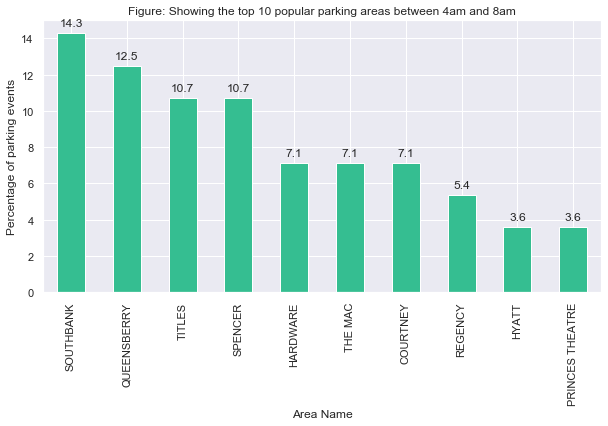

In [32]:
mask = (parkingdata['Arrival Time'].dt.hour >= 4) & (parkingdata['Arrival Time'].dt.hour <= 7)
between4and8 = parkingdata.loc[mask]
mostPopular = between4and8['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 4am and 8am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

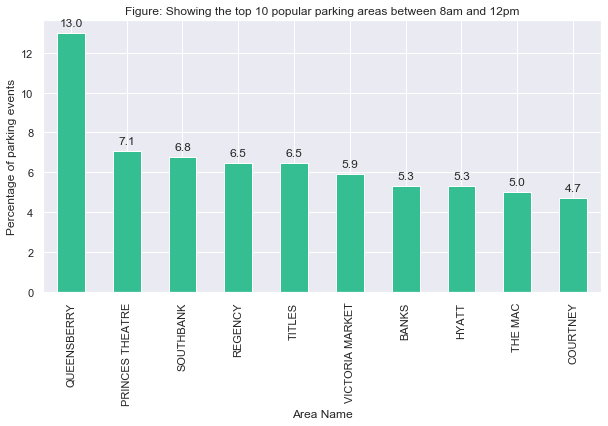

In [33]:
mask = (parkingdata['Arrival Time'].dt.hour >= 8) & (parkingdata['Arrival Time'].dt.hour <= 11)
between8and12 = parkingdata.loc[mask]
mostPopular = between8and12['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 8am and 12pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

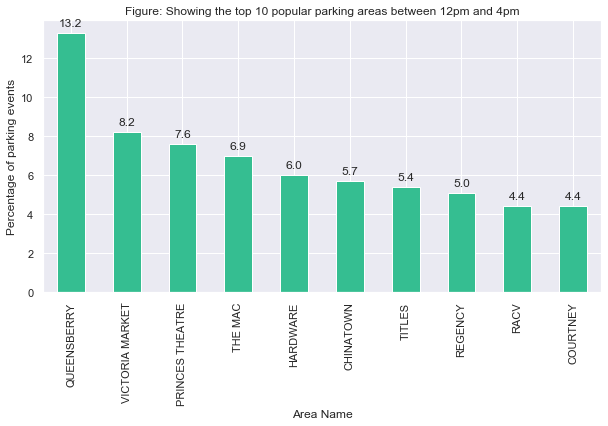

In [34]:
mask = (parkingdata['Arrival Time'].dt.hour >= 12) & (parkingdata['Arrival Time'].dt.hour <= 15)
between12and16 = parkingdata.loc[mask]
mostPopular = between12and16['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 12pm and 4pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

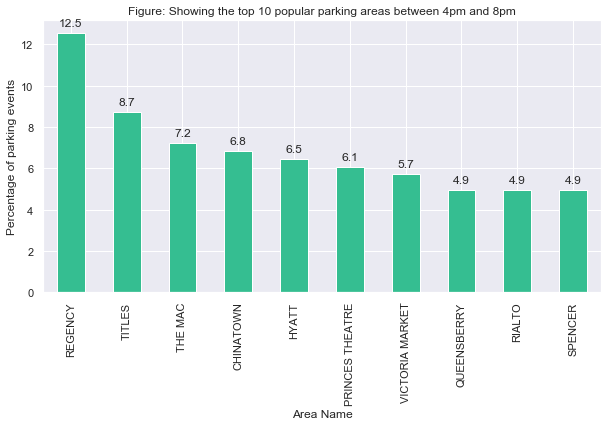

In [35]:
mask = (parkingdata['Arrival Time'].dt.hour >= 16) & (parkingdata['Arrival Time'].dt.hour <= 19)
between16and20 = parkingdata.loc[mask]
mostPopular = between16and20['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 4pm and 8pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

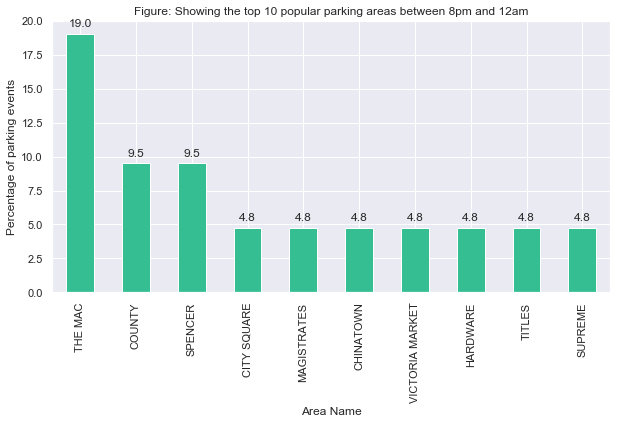

In [36]:
mask = (parkingdata['Arrival Time'].dt.hour >= 20) & (parkingdata['Arrival Time'].dt.hour <= 23)
between20and00 = parkingdata.loc[mask]
mostPopular = between20and00['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar',color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 8pm and 12am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

In [37]:
#Selecting only the rows which have infringement
onlyInfringe = parkingdata.loc[parkingdata['In Violation?'] == 1, :]
onlyInfringe.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,2012-08-24 11:34:36,2012-08-24 12:49:09,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
8,CITY SQUARE,FLINDERS STREET,SWANSTON STREET,RUSSELL STREET,3,1630N,2012-05-19 18:20:01,2012-05-19 19:19:58,3597,1/2P MTR SAT 7:30-1930,1,670,1123
10,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-02-25 18:30:31,2012-02-25 21:02:36,9125,2P DIS M-SUN 0:00-23:59,1,1221,504
11,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2858,2011-11-17 09:00:00,2011-11-17 10:41:06,6066,1P MTR M-SAT 7:30-19:30,1,894,1996
13,CHINATOWN,LT COLLINS STREET,SWANSTON STREET,RUSSELL STREET,4,2189S,2012-01-29 12:26:29,2012-01-29 12:28:16,107,S/ NO STOP CCV M-SUN 0:00-23:59,1,911,1181
15,SOUTHBANK,COVENTRY STREET,DODDS STREET,WELLS STREET,4,9317S,2012-02-20 13:50:40,2012-02-20 16:33:33,9773,2P TKT A M-F 7:30-18:30,1,547,4054
23,QUEENSBERRY,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,4,7733S,2012-07-24 11:56:34,2012-07-24 15:10:10,11616,LZ 30M M-F 7:30-18:30,1,1175,4420
28,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7642N,2012-02-15 11:32:34,2012-02-15 12:09:35,2221,1/4P M-SAT 7:30-18:30,1,1381,4001
30,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,3,2066N,2012-09-03 09:24:51,2012-09-03 10:45:41,4850,1/2P M-SAT 7:30-19:30,1,528,1290
45,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6628,2011-11-11 17:42:32,2011-11-11 19:50:44,7692,2P MTR M-SAT 7:30-20:30,1,681,2812


In [38]:
#Separating the month number from the Departure Time column for further analysis
onlyInfringe['Month Number'] = onlyInfringe['Departure Time'].dt.month
onlyInfringe['Month Number'].value_counts()

C:\Users\fahim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


10    20
11    17
9     15
5     15
7     12
2     12
4     11
8     10
3     10
1     10
6      8
12     6
Name: Month Number, dtype: int64

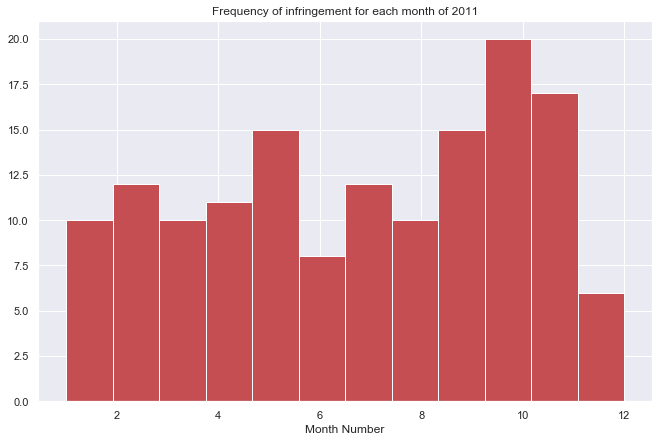

In [74]:
#Creating a histogram to show the frequency of infringement each month of the year 2011

plt.figure(figsize=(11,7))
_ = sns.distplot(onlyInfringe['Month Number'], kde = False, bins = 12, hist_kws = {"alpha": 1}, color = 'r')
_ = plt.title("Frequency of infringement for each month of 2011")

In [47]:
#Checking all the values of Sign feature
onlyInfringe['Sign'].value_counts()

1P MTR M-SAT 7:30-19:30                  35
1/2P MTR M-SAT 7:30-19:30                15
1/2P M-SAT 7:30-19:30                     9
2P MTR M-SAT 7:30-20:30                   8
1P SUN 7:30-18:30                         4
2P MTR M-F 7:30-18:30                     4
2P SUN 7:30-18:30                         3
2P TKT A M-F 7:30-18:30                   3
P/ 5 M-SAT 7:30-19:30                     3
2P MTR M-F 9:30-20:30                     3
1/2P M-F 7:30-18:30                       3
1P TKT A M-F 7:30-18:30                   3
1/4P M-SAT 7:30-19:30                     2
1/4P M-SAT 7:30-18:30                     2
CW TOW M-F 7:30-9:30                      2
LZ 30M M-F 7:30-18:30                     2
1P AOT M-SAT 19:30-23:59                  2
1/2P RPA M-SUN 7:30-18:30                 2
LZ 15M M-F 7:30-19:30                     2
1P MTR M-SAT 7:30-18:30                   2
1/4P M-F 7:30-18:30                       2
1P MTR M-F 9:30-19:30                     2
CW TOW M-F 7:00-9:30            

In [49]:
#Creating a new dataframe containing only P based parking sign infringements
pSignInfringe = onlyInfringe.loc[onlyInfringe.Sign.str.contains("1P|1/2P|2P|4P|1/4P|P10|P/"), :]
pSignInfringe.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID,Month Number
8,CITY SQUARE,FLINDERS STREET,SWANSTON STREET,RUSSELL STREET,3,1630N,2012-05-19 18:20:01,2012-05-19 19:19:58,3597,1/2P MTR SAT 7:30-1930,1,670,1123,5
10,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-02-25 18:30:31,2012-02-25 21:02:36,9125,2P DIS M-SUN 0:00-23:59,1,1221,504,2
11,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2858,2011-11-17 09:00:00,2011-11-17 10:41:06,6066,1P MTR M-SAT 7:30-19:30,1,894,1996,11
15,SOUTHBANK,COVENTRY STREET,DODDS STREET,WELLS STREET,4,9317S,2012-02-20 13:50:40,2012-02-20 16:33:33,9773,2P TKT A M-F 7:30-18:30,1,547,4054,2
28,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7642N,2012-02-15 11:32:34,2012-02-15 12:09:35,2221,1/4P M-SAT 7:30-18:30,1,1381,4001,2
30,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,3,2066N,2012-09-03 09:24:51,2012-09-03 10:45:41,4850,1/2P M-SAT 7:30-19:30,1,528,1290,9
45,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6628,2011-11-11 17:42:32,2011-11-11 19:50:44,7692,2P MTR M-SAT 7:30-20:30,1,681,2812,11
53,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2942,2012-05-05 13:17:55,2012-05-05 14:59:35,6100,1P MTR M-SAT 7:30-19:30,1,894,2019,5
55,HYATT,EXHIBITION STREET,LT COLLINS STREET,COLLINS STREET,1,C364,2011-01-11 08:11:48,2011-01-11 16:48:39,31011,1P MTR M-SAT 7:30-19:30,1,647,243,1
56,BANKS,QUEEN STREET,FLINDERS LANE,FLINDERS STREET,5,975W,2012-03-03 12:53:27,2012-03-03 14:06:27,4380,1P MTR M-SAT 7:30-19:30,1,1171,693,3


In [50]:
#Checking values of the Sign column of the new dataframe
pSignInfringe['Sign'].value_counts()

1P MTR M-SAT 7:30-19:30        35
1/2P MTR M-SAT 7:30-19:30      15
1/2P M-SAT 7:30-19:30           9
2P MTR M-SAT 7:30-20:30         8
1P SUN 7:30-18:30               4
2P MTR M-F 7:30-18:30           4
1P TKT A M-F 7:30-18:30         3
2P TKT A M-F 7:30-18:30         3
2P SUN 7:30-18:30               3
1/2P M-F 7:30-18:30             3
P/ 5 M-SAT 7:30-19:30           3
2P MTR M-F 9:30-20:30           3
1/4P M-SAT 7:30-19:30           2
1P AOT M-SAT 19:30-23:59        2
1P MTR M-SAT 7:30-18:30         2
1/4P M-SAT 7:30-18:30           2
1/4P M-F 7:30-18:30             2
1/2P RPA M-SUN 7:30-18:30       2
1P MTR M-F 9:30-19:30           2
P10 M-SUN 0:00-23:59            1
2P MTR M-F 9:30-18:30           1
2P DIS M-SUN 0:00-23:59         1
1/2P A RPE M-F 7:30-18:30       1
1/4P M-F 7:30-16:00             1
4P MTR M-F 7:30-18:30           1
1P A RPE M-SUN 7:30-23:00       1
1P TKT A M-SAT 7:30-19:30       1
1P MTR SAT 7:30-12:30           1
1/2P MTR SAT 7:30-1930          1
2P RPA M-F 7:3

In [51]:
#Creating a new feature based on the parking type of each P based parking sign among Meter, Ticket or Others
pSignInfringe['Parking Type'] = pSignInfringe.Sign.apply(lambda x: "Meter" if 'MTR' in x else ("Ticket" if "TKT" in x else "Others"))
pSignInfringe.head(10)

C:\Users\fahim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID,Month Number,Parking Type
8,CITY SQUARE,FLINDERS STREET,SWANSTON STREET,RUSSELL STREET,3,1630N,2012-05-19 18:20:01,2012-05-19 19:19:58,3597,1/2P MTR SAT 7:30-1930,1,670,1123,5,Meter
10,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-02-25 18:30:31,2012-02-25 21:02:36,9125,2P DIS M-SUN 0:00-23:59,1,1221,504,2,Others
11,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,1,C2858,2011-11-17 09:00:00,2011-11-17 10:41:06,6066,1P MTR M-SAT 7:30-19:30,1,894,1996,11,Meter
15,SOUTHBANK,COVENTRY STREET,DODDS STREET,WELLS STREET,4,9317S,2012-02-20 13:50:40,2012-02-20 16:33:33,9773,2P TKT A M-F 7:30-18:30,1,547,4054,2,Ticket
28,QUEENSBERRY,VICTORIA STREET,KING STREET,HAWKE STREET,3,7642N,2012-02-15 11:32:34,2012-02-15 12:09:35,2221,1/4P M-SAT 7:30-18:30,1,1381,4001,2,Others
30,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,3,2066N,2012-09-03 09:24:51,2012-09-03 10:45:41,4850,1/2P M-SAT 7:30-19:30,1,528,1290,9,Others
45,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6628,2011-11-11 17:42:32,2011-11-11 19:50:44,7692,2P MTR M-SAT 7:30-20:30,1,681,2812,11,Meter
53,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2942,2012-05-05 13:17:55,2012-05-05 14:59:35,6100,1P MTR M-SAT 7:30-19:30,1,894,2019,5,Meter
55,HYATT,EXHIBITION STREET,LT COLLINS STREET,COLLINS STREET,1,C364,2011-01-11 08:11:48,2011-01-11 16:48:39,31011,1P MTR M-SAT 7:30-19:30,1,647,243,1,Meter
56,BANKS,QUEEN STREET,FLINDERS LANE,FLINDERS STREET,5,975W,2012-03-03 12:53:27,2012-03-03 14:06:27,4380,1P MTR M-SAT 7:30-19:30,1,1171,693,3,Meter


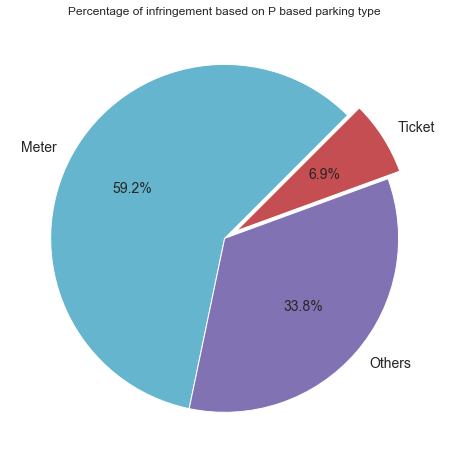

In [68]:
#Creating a pie chart based on which type of parking had more infringements

plt.figure(figsize=(10,8))
plt.pie(pSignInfringe['Parking Type'].value_counts(), labels = pSignInfringe['Parking Type'].unique(), colors = ('c', 'm', 'r'), startangle = 45, autopct = "%1.1f%%", explode = (0,0,0.08), textprops={'fontsize': 14})
plt.title("Percentage of infringement based on P based parking type")
plt.show()